<a href="https://colab.research.google.com/github/KrisDA-1/NU_Pandas/blob/main/CNN_Train_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from subprocess import check_output

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

In [3]:
train_df = pd.read_csv('train.csv', sep=',', engine='python', on_bad_lines='warn')
test_df = pd.read_csv('test.csv', sep=',', engine='python', on_bad_lines='warn')

In [4]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42568,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42569,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42570,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42568,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42569,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42570,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data = np.array(train_df, dtype = 'float32')

In [8]:
test_data = np.array(test_df, dtype='float32')

In [9]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [10]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

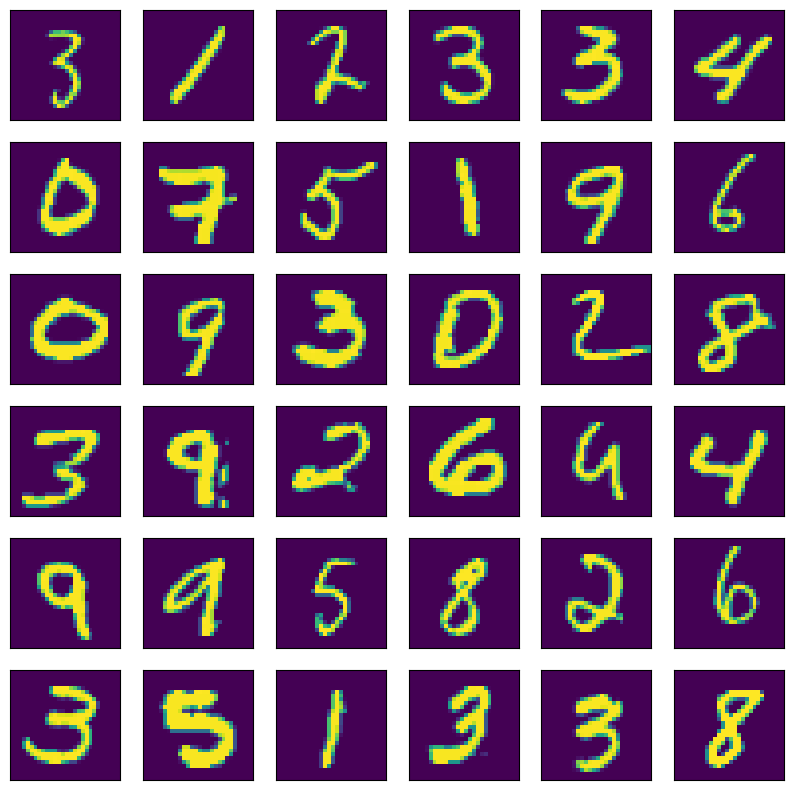

In [11]:

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])

plt.show()

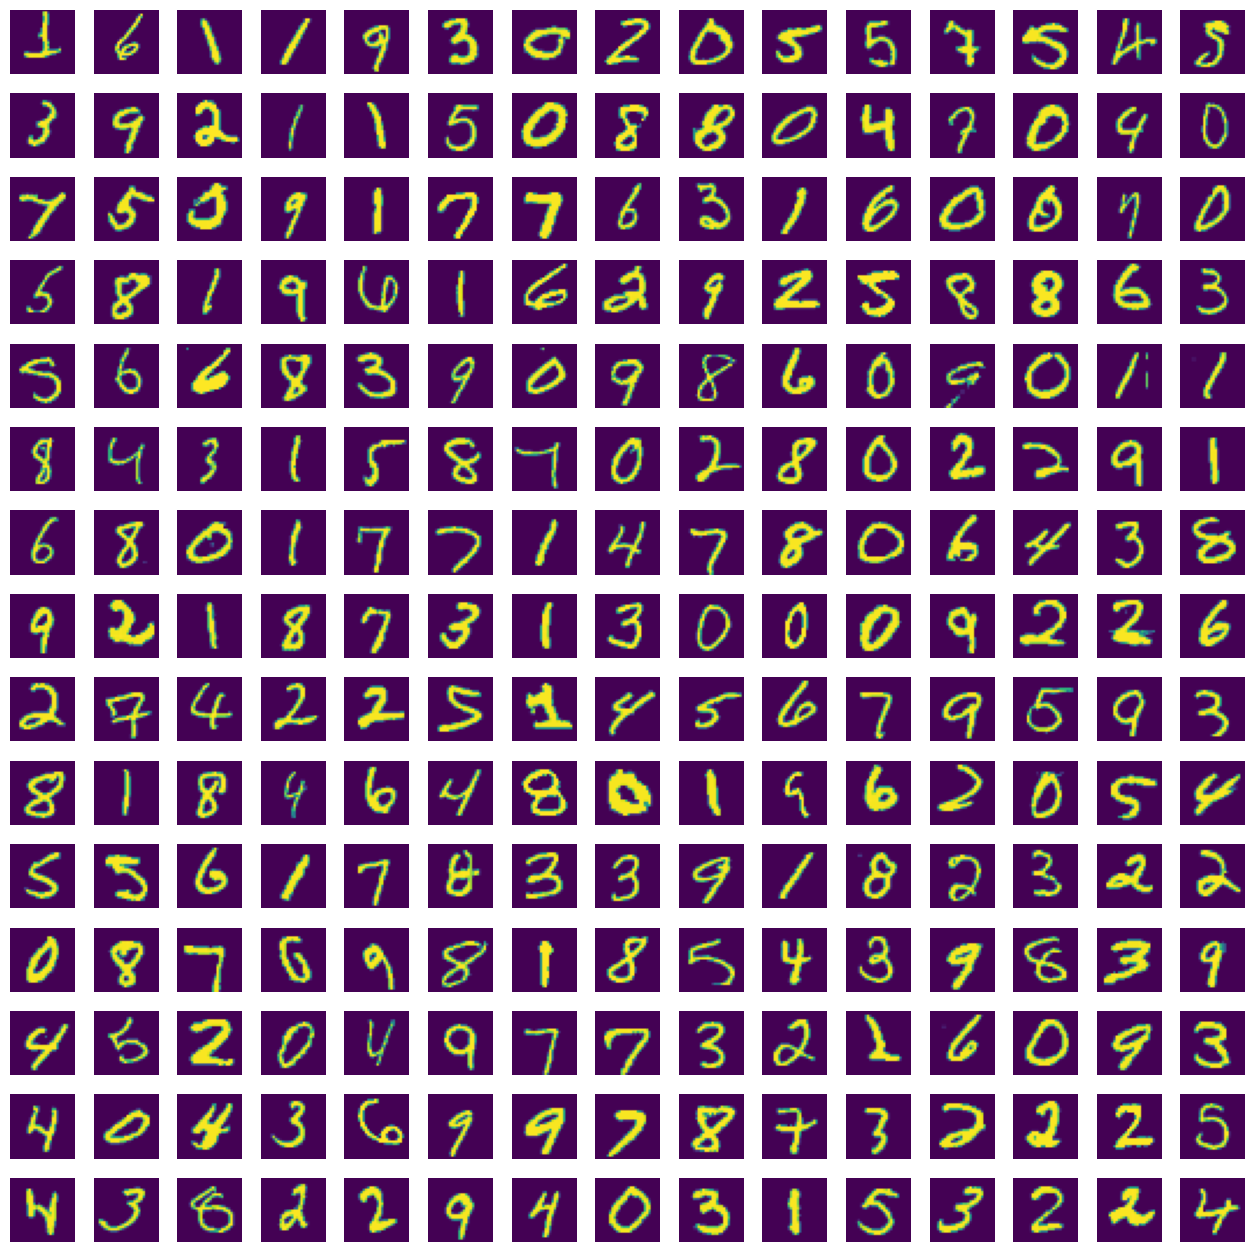

In [12]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_data) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow( train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])

    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [13]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)

In [14]:
x_test= test_data/255

In [15]:
x_test = x_test.reshape(x_test.shape[0],*image_shape)

In [16]:
# Reshape x_train and x_validate
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_validate = x_validate.reshape(x_validate.shape[0], 28, 28, 1)

In [17]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')

])

In [18]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [ ]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.2692 - loss: 2.1299 - val_accuracy: 0.6161 - val_loss: 1.5380
Epoch 2/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6598 - loss: 1.3798 - val_accuracy: 0.8240 - val_loss: 0.8909
Epoch 3/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8303 - loss: 0.7917 - val_accuracy: 0.8610 - val_loss: 0.5472
Epoch 4/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8658 - loss: 0.5078 - val_accuracy: 0.8868 - val_loss: 0.4128
Epoch 5/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8891 - loss: 0.4041 - val_accuracy: 0.8974 - val_loss: 0.3536
Epoch 6/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9017 - loss: 0.3430 - val_accuracy: 0.9055 - val_loss: 0.3229
Epoch 7/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9083 - loss: 0.3135 - val_accuracy: 0.9107 - val_loss: 0.3013
Epoch 8/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9162 - loss: 0.2930 - val_accuracy: 0.9167 - val_loss: 0.2840
Epoch 9/

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')